# Pymaceuticals Inc.
---

### Analysis

Based on the analysis of the four treatment regimens, we can say that Capomulin appears to be the most effective in reducing tumor volume, as it has the lowest final average tumor volume and the smallest interquartile range (IQR) among the four treatments. This is supported by the box plot, where Capomulin has the lowest median and the least amount of potential outliers.

In contrast, Infubinol had the highest final average tumor volume and the largest IQR among the four treatments. This is also supported by the box plot, where Infubinol has the highest median and the most potential outliers. Ramicane and Ceftamin had similar final average tumor volumes, with Ramicane having a slightly lower median and smaller IQR than Ceftamin. However, both Ramicane and Ceftamin had more potential outliers than Capomulin.

Overall, the analysis suggests that Capomulin is the most effective treatment in reducing tumor volume compared to the other three treatments.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study = pd.merge(study_results, mouse_metadata,  how="left", on="Mouse ID")
# Display the data table for preview
combined_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
total_mice = combined_study["Mouse ID"].nunique()
print(total_mice)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#scc_study["Mouse ID"].unique()
duplicate_mice = combined_study[combined_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_study.loc[combined_study['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df = clean_df[~(clean_df["Mouse ID"] == "g989")]

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df["Mouse ID"].nunique()
print(total_mice)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped = clean_df.groupby('Drug Regimen')
mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
variance = grouped['Tumor Volume (mm3)'].var()
std_dev = grouped['Tumor Volume (mm3)'].std()
sem = grouped['Tumor Volume (mm3)'].apply(st.sem)

summary_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': variance,
                           'Tumor Volume Std. Dev.': std_dev, 'Tumor Volume Std. Err.': sem})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


summary_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

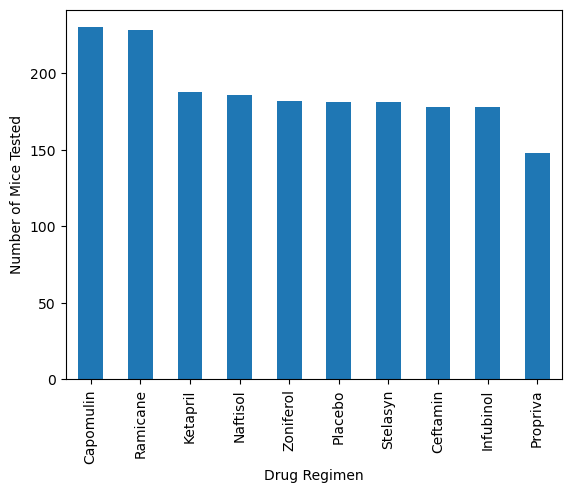

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_counts = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
timepoint_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Mice Tested')

plt.show()

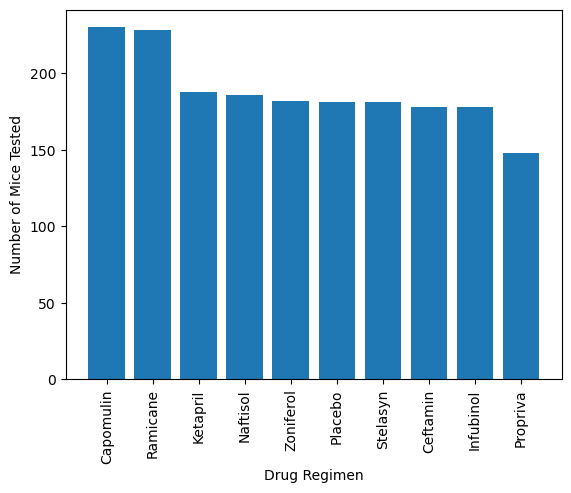

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_counts = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
plt.bar(timepoint_counts.index, timepoint_counts.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Mice Tested')

plt.show()

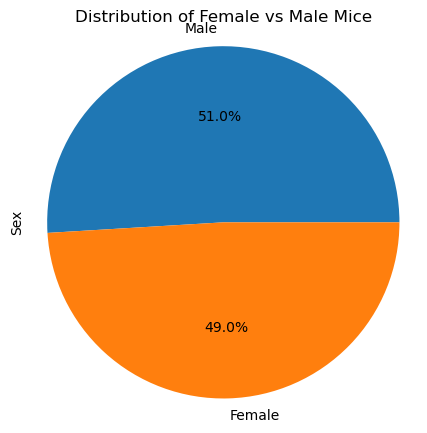

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = clean_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), 
                   title='Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()




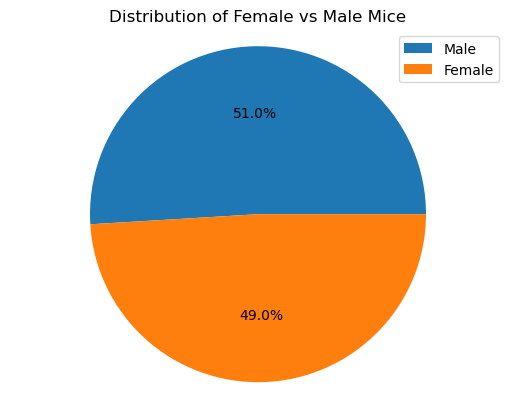

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = clean_df['Sex'].value_counts()
plt.pie(gender_counts.values, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.legend(gender_counts.index)
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

#New DataFrame for last timepoint for each mouse.
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Timepoint'], how='left')


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Loop through each treatment
for treatment in treatments:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == treatment]
    # add subset
    tumor_volumes_subset = tumor_vol_data['Tumor Volume (mm3)']
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_volumes_subset.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes_subset.loc[(tumor_volumes_subset < lower_bound) | (tumor_volumes_subset > upper_bound)]
    # Print results
    print(f"{treatment}'s potential outliers: {outliers}")
    # Append to list
    tumor_volumes.append(tumor_volumes_subset)



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


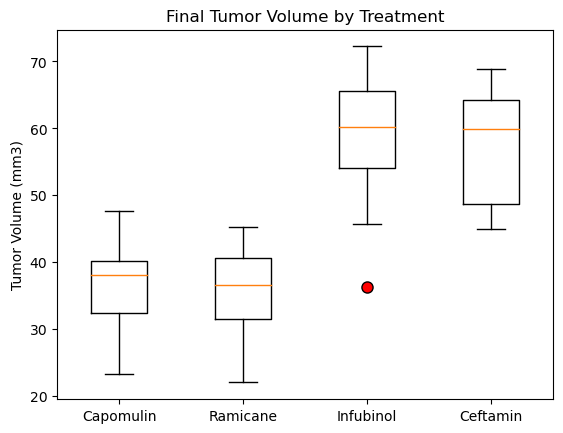

In [16]:
# Create a figure and axis object
fig, ax = plt.subplots()

flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Plot the boxplot
ax.boxplot(tumor_volumes, labels=treatments, flierprops= flierprops)
ax.set_title('Final Tumor Volume by Treatment')
ax.set_ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()



## Line and Scatter Plots

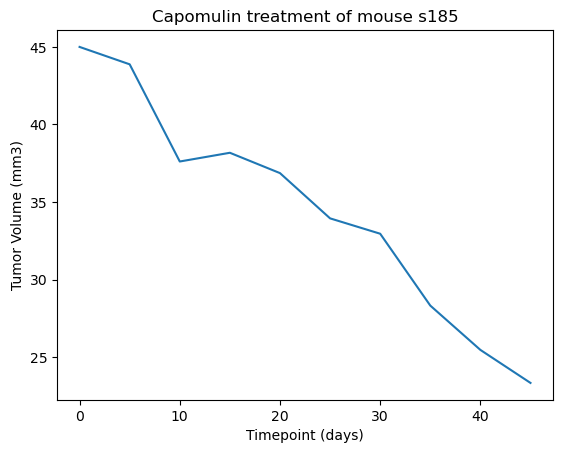

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select a mouse treated with Capomulin
mouse_id = 's185'
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_capomulin_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

# Plot tumor volume vs. time point for the selected mouse
plt.plot(mouse_capomulin_df['Timepoint'], mouse_capomulin_df['Tumor Volume (mm3)'])

# Set the title and axis labels
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()



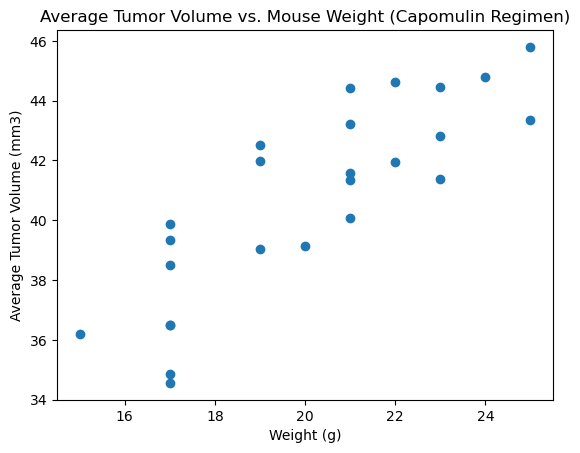

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter the clean_df to only include Capomulin regimen data
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and weight for each mouse
avg_tumor_vol_weight = capomulin_data.groupby(["Mouse ID"])[["Tumor Volume (mm3)", "Weight (g)"]].mean()

# Generate a scatter plot
plt.scatter(avg_tumor_vol_weight["Weight (g)"], avg_tumor_vol_weight["Tumor Volume (mm3)"])

# Set the x and y axis labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")

# Show the plot
plt.show()



## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


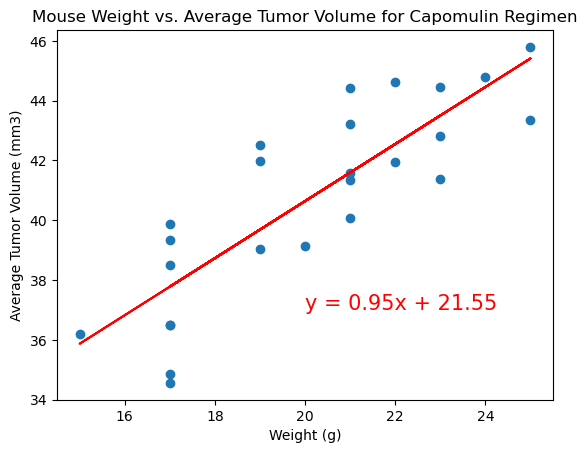

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(mouse_weight, avg_tumor_vol)

# Linear regression model
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq, (20, 37), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Show plot
plt.show()
